### Logistic regression

In [1]:
import pandas as pd
#!pip install seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv("Titanic.csv")
df.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [4]:
print(df.shape)

(1313, 5)


#### Analyzing the data a bit

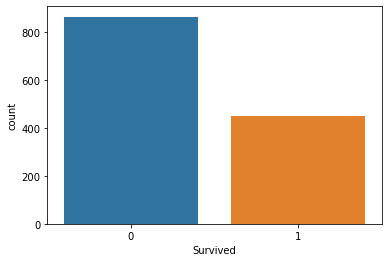

In [5]:
sns.countplot(x = "Survived", data = df)

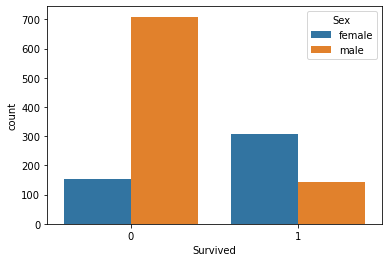

In [6]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

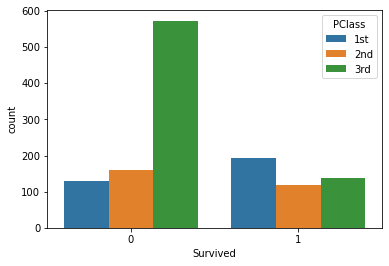

In [7]:
sns.countplot(x = "Survived", hue = "PClass", data = df)

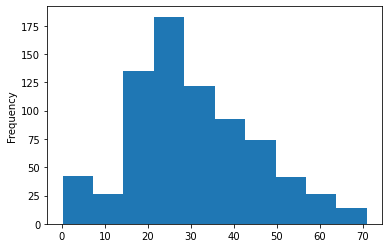

In [8]:
df["Age"].plot.hist()

#### Data cleaning and generalization

In [9]:
# Counting NaN fields
df.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

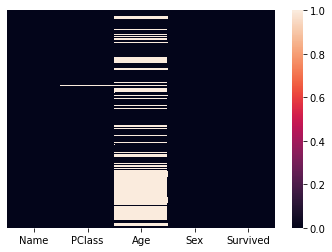

In [12]:
#heat-map
sns.heatmap(df.isnull(), yticklabels=False)

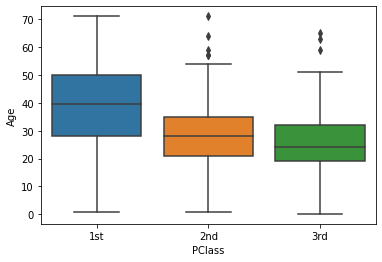

In [13]:
sns.boxplot(x = 'PClass', y = 'Age', data = df)

In [14]:
#removing NaN values
df.dropna(inplace=True)

#### we can't feed in characters as input for ML models so we are converting the values to binary.

male = 0 means female
male = 1 means male

2nd 3rd = 0 0 means 1st class
2nd 3rd = 1 0 means 2nd class

In [18]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,0
1,0
2,1
3,0
4,1


In [20]:
pcl = pd.get_dummies(df['PClass'], drop_first=True)
pcl.head()

,2nd,3rd
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
df = pd.concat([df, sex, pcl], axis=1)
df.head()

,Name,PClass,Age,Sex,Survived,male,2nd,3rd
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,0,0,0
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,0,0,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,1,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,0,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,1,0,0


In [26]:
df.drop(['Sex', 'Name', 'PClass'], axis=1, inplace=True)
df.head()

,Age,Survived,male,2nd,3rd
0,29.00,1,0,0,0
1,2.00,0,0,0,0
2,30.00,0,1,0,0
3,25.00,0,0,0,0
4,0.92,1,1,0,0


### Split data in train and test

In [27]:
#output
y = df['Survived']
#input
X = df.drop("Survived", axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [41]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred = logistic_model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.92      0.86       132\n           1       0.86      0.69      0.77        95\n\n    accuracy                           0.82       227\n   macro avg       0.83      0.81      0.81       227\nweighted avg       0.83      0.82      0.82       227\n'

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, pred)

array([[121,  11],
       [ 29,  66]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, pred)

0.8237885462555066

In [49]:
"""
Accuracy score from confusion metrix
            pred_yes, pred_no
Actual yes [[121,  11]],
Actual No   [29 ,  66]

add 121 and 66 and divide by sum of all four
"""
acc_score = (121 + 66) / (121 + 11 + 29 + 66)
print(acc_score)

0.8237885462555066
